In [29]:
%matplotlib notebook 
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
import scipy
from scipy import stats

In [31]:
data2018 = pd.read_csv('C:\\Users\\Francis\\Google Drive\\Data\\___PACE\\STEM-Summer2018\\2018expeditions.csv', header=0)

In [32]:
# look at the first five rows
data2018.head()

,Unnamed: 0,"October Oyster Monitoring IS 288 ORS, October 13, 2016","ISLA 601 Sherman Creek South, October 21, 2016","TYWLS Expedition 1 Astoria TYWLS ORS, November 9, 2016","TYWLS Expedition 2 Astoria TYWLS ORS, November 16, 2016","Sherman Creek Park 2 Sherman Creek South, December 2, 2016","789 Monitoring Kaiser Site at 22nd street IS 288 ORS, December 9, 2016","Cold Cold Cold IS 288 ORS, January 27, 2017","Eels and Shrimp IS 288 ORS, March 21, 2017","TYWLS Expedition 3 (6-1) Astoria TYWLS ORS, April 6, 2017",...,"TYWLS Expedition 5 (7 - 1) Astoria TYWLS ORS, May 10, 2017","Shooting Stars Week IS 288 ORS, May 19, 2017","Sherman Creek 4 Sherman Creek South, May 30, 2017","Test BOP Pier 101, September 12, 2017","Weirdy Fish IS 288 ORS, October 26, 2017","No-Admin Test Expedition 2 Pier 101, November 30, 2017","test 3 Pier 101, December 7, 2017","Sub Zero IS 288 ORS, December 20, 2017","Test for Maintenance BOP Test Station, December 26, 2017","SNOWYSTERS IS 288 ORS, February 7, 2018"
0,"Water color\r\n(1=Light Blue,2=Dark Blue,3=Lig...",3,4,4,6,6,2,2,4,5,...,4,2,5,NaN,4,NaN,NaN,1,NaN,3.0
1,"Oil sheen present?\r\n(1=Yes,0=No)",0,1,0,0,0,0,0,0,0,...,1,0,0,0,1,NaN,NaN,0,NaN,0.0
2,Oyster Measurements (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Substrate Shell #1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Outer side photo,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,http://s3-us-west-1.amazonaws.com/digital-plat...,...,http://s3-us-west-1.amazonaws.com/digital-plat...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
# Display the column names
data2018.columns

Index(['Unnamed: 0',
       'October Oyster Monitoring\r\nIS 288 ORS,\r\nOctober 13, 2016',
       'ISLA 601\r\nSherman Creek South,\r\nOctober 21, 2016',
       'TYWLS Expedition 1\r\nAstoria TYWLS ORS,\r\nNovember 9, 2016',
       'TYWLS Expedition 2\r\nAstoria TYWLS ORS,\r\nNovember 16, 2016',
       'Sherman Creek Park 2\r\nSherman Creek South,\r\nDecember 2, 2016',
       '789 Monitoring Kaiser Site at 22nd street\r\nIS 288 ORS,\r\nDecember 9, 2016',
       'Cold Cold Cold\r\nIS 288 ORS,\r\nJanuary 27, 2017',
       'Eels and Shrimp\r\nIS 288 ORS,\r\nMarch 21, 2017',
       'TYWLS Expedition 3 (6-1)\r\nAstoria TYWLS ORS,\r\nApril 6, 2017',
       'TYWLS Expedition 4 (7-2)\r\nAstoria TYWLS ORS,\r\nApril 20, 2017',
       'Sherman Creek 3\r\nSherman Creek South,\r\nApril 21, 2017',
       'TYWLS Expedition 5 (7 - 1)\r\nAstoria TYWLS ORS,\r\nMay 10, 2017',
       'Shooting Stars Week\r\nIS 288 ORS,\r\nMay 19, 2017',
       'Sherman Creek 4\r\nSherman Creek South,\r\nMay 30, 2017',
  

In [34]:
# look at the last five rows
data2018.tail()

,Unnamed: 0,"October Oyster Monitoring IS 288 ORS, October 13, 2016","ISLA 601 Sherman Creek South, October 21, 2016","TYWLS Expedition 1 Astoria TYWLS ORS, November 9, 2016","TYWLS Expedition 2 Astoria TYWLS ORS, November 16, 2016","Sherman Creek Park 2 Sherman Creek South, December 2, 2016","789 Monitoring Kaiser Site at 22nd street IS 288 ORS, December 9, 2016","Cold Cold Cold IS 288 ORS, January 27, 2017","Eels and Shrimp IS 288 ORS, March 21, 2017","TYWLS Expedition 3 (6-1) Astoria TYWLS ORS, April 6, 2017",...,"TYWLS Expedition 5 (7 - 1) Astoria TYWLS ORS, May 10, 2017","Shooting Stars Week IS 288 ORS, May 19, 2017","Sherman Creek 4 Sherman Creek South, May 30, 2017","Test BOP Pier 101, September 12, 2017","Weirdy Fish IS 288 ORS, October 26, 2017","No-Admin Test Expedition 2 Pier 101, November 30, 2017","test 3 Pier 101, December 7, 2017","Sub Zero IS 288 ORS, December 20, 2017","Test for Maintenance BOP Test Station, December 26, 2017","SNOWYSTERS IS 288 ORS, February 7, 2018"
220,Label,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Phosphate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
221,Method,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,test strips,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,Unit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ppm,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223,Results,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"5,5,5",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,Average,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# transpose the data -- interchange rows and columns
data2018 = data2018.T

In [36]:
data2018.head()

,0,1,2,3,4,5,6,7,8,9,...,215,216,217,218,219,220,221,222,223,224
Unnamed: 0,"Water color\r\n(1=Light Blue,2=Dark Blue,3=Lig...","Oil sheen present?\r\n(1=Yes,0=No)",Oyster Measurements (mm),Substrate Shell #1,Outer side photo,Inner side photo,Set date,Source,Total number of live oysters at baseline,Total mass of live oysters at baseline (g),...,Method,Unit,Results,Average,Other,Label,Method,Unit,Results,Average
"October Oyster Monitoring\r\nIS 288 ORS,\r\nOctober 13, 2016",3,0,NaN,NaN,NaN,NaN,7/14/2015,"Muscongus Bay, Maine",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ISLA 601\r\nSherman Creek South,\r\nOctober 21, 2016",4,1,NaN,NaN,NaN,NaN,11/9/2016,Harlem River,12,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"TYWLS Expedition 1\r\nAstoria TYWLS ORS,\r\nNovember 9, 2016",4,0,NaN,NaN,NaN,NaN,7/31/2015,"Muscongus Bay, Maine",4,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"TYWLS Expedition 2\r\nAstoria TYWLS ORS,\r\nNovember 16, 2016",6,0,NaN,NaN,NaN,NaN,7/31/2015,"Muscongus Bay, Maine",4,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
data2018.iloc[0]

0      Water color\r\n(1=Light Blue,2=Dark Blue,3=Lig...
1                     Oil sheen present?\r\n(1=Yes,0=No)
2                               Oyster Measurements (mm)
3                                     Substrate Shell #1
4                                       Outer side photo
5                                       Inner side photo
6                                               Set date
7                                                 Source
8               Total number of live oysters at baseline
9             Total mass of live oysters at baseline (g)
10                 Total number of live oysters on shell
11     Total mass of scrubbed substrate shell + oyste...
12                                     Measurements (mm)
13                     Minimum size of live oysters (mm)
14                     Maximum size of live oysters (mm)
15                     Average size of live oysters (mm)
16                                    Substrate Shell #2
17                             

In [38]:
# change the column names to the names in the first row  instead of 1, 2, ... 
data2018.columns = data2018.iloc[0]

In [39]:
data2018.head()

Unnamed: 0,"Water color (1=Light Blue,2=Dark Blue,3=Light Green, 4=Dark Green,5=Light Brown,6=Dark Brown)","Oil sheen present? (1=Yes,0=No)",Oyster Measurements (mm),Substrate Shell #1,Outer side photo,Inner side photo,Set date,Source,Total number of live oysters at baseline,Total mass of live oysters at baseline (g),...,Method,Unit,Results,Average,Other,Label,Method,Unit,Results,Average
Unnamed: 0,"Water color\r\n(1=Light Blue,2=Dark Blue,3=Lig...","Oil sheen present?\r\n(1=Yes,0=No)",Oyster Measurements (mm),Substrate Shell #1,Outer side photo,Inner side photo,Set date,Source,Total number of live oysters at baseline,Total mass of live oysters at baseline (g),...,Method,Unit,Results,Average,Other,Label,Method,Unit,Results,Average
"October Oyster Monitoring\r\nIS 288 ORS,\r\nOctober 13, 2016",3,0,NaN,NaN,NaN,NaN,7/14/2015,"Muscongus Bay, Maine",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ISLA 601\r\nSherman Creek South,\r\nOctober 21, 2016",4,1,NaN,NaN,NaN,NaN,11/9/2016,Harlem River,12,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"TYWLS Expedition 1\r\nAstoria TYWLS ORS,\r\nNovember 9, 2016",4,0,NaN,NaN,NaN,NaN,7/31/2015,"Muscongus Bay, Maine",4,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"TYWLS Expedition 2\r\nAstoria TYWLS ORS,\r\nNovember 16, 2016",6,0,NaN,NaN,NaN,NaN,7/31/2015,"Muscongus Bay, Maine",4,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# since the first row of the transposed data contains the variable names and not data, drop the first row
data2018 = data2018.drop(data2018.index[0])

In [41]:
# take a look and make sure you got what you wanted
data2018.head()

Unnamed: 0,"Water color (1=Light Blue,2=Dark Blue,3=Light Green, 4=Dark Green,5=Light Brown,6=Dark Brown)","Oil sheen present? (1=Yes,0=No)",Oyster Measurements (mm),Substrate Shell #1,Outer side photo,Inner side photo,Set date,Source,Total number of live oysters at baseline,Total mass of live oysters at baseline (g),...,Method,Unit,Results,Average,Other,Label,Method,Unit,Results,Average
"October Oyster Monitoring\r\nIS 288 ORS,\r\nOctober 13, 2016",3,0,NaN,NaN,NaN,NaN,7/14/2015,"Muscongus Bay, Maine",0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"ISLA 601\r\nSherman Creek South,\r\nOctober 21, 2016",4,1,NaN,NaN,NaN,NaN,11/9/2016,Harlem River,12,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"TYWLS Expedition 1\r\nAstoria TYWLS ORS,\r\nNovember 9, 2016",4,0,NaN,NaN,NaN,NaN,7/31/2015,"Muscongus Bay, Maine",4,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"TYWLS Expedition 2\r\nAstoria TYWLS ORS,\r\nNovember 16, 2016",6,0,NaN,NaN,NaN,NaN,7/31/2015,"Muscongus Bay, Maine",4,3.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"Sherman Creek Park 2\r\nSherman Creek South,\r\nDecember 2, 2016",6,0,NaN,NaN,NaN,http://s3-us-west-1.amazonaws.com/digital-plat...,11/9/2016,Harlem River,12,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
data2018.shape

(21, 225)

In [43]:
# you can print all the variable names
for i in range(len(data2018.columns)):
    print(data2018.columns[i])

Water color
(1=Light Blue,2=Dark Blue,3=Light Green,
4=Dark Green,5=Light Brown,6=Dark Brown)
Oil sheen present?
(1=Yes,0=No)
Oyster Measurements (mm)
Substrate Shell #1
Outer side photo
Inner side photo
Set date
Source
Total number of live oysters at baseline
Total mass of live oysters at baseline (g)
Total number of live oysters on shell
Total mass of scrubbed substrate shell + oysters + tag (g)
Measurements (mm)
Minimum size of live oysters (mm)
Maximum size of live oysters (mm)
Average size of live oysters (mm)
Substrate Shell #2
Outer side photo
Inner side photo
Set date
Source
Total number of live oysters at baseline
Total mass of live oysters at baseline (g)
Total number of live oysters on shell
Total mass of scrubbed substrate shell + oysters + tag (g)
Measurements (mm)
Minimum size of live oysters (mm)
Maximum size of live oysters (mm)
Average size of live oysters (mm)
Substrate Shell #3
Outer side photo
Inner side photo
Set date
Source
Total number of live oysters at baseline

In [44]:
# you can explore specific subsets of the data
# "Oil sheen present? (1=Yes,0=No)" is the second column so we can extract it via implicit indexing
# Remember  Python indexing is zero based
for i in range(3):
    print(data2018.iloc[i, 1])

0
1
0


In [45]:
# Display the measuremts for all substrates for the second expedition
data2018.iloc[1]["Measurements (mm)"]

Measurements (mm)              3.2,6.2,0.3,0.4,2.5,3.4,2,3.2,1.5
Measurements (mm)                          1.5,3.4,1.3,2.3,2.2,2
Measurements (mm)                      1.3,3.4,1,2.4,1.7,3.7,0.9
Measurements (mm)                          2.4,3.1,2,1.5,2.7,1.7
Measurements (mm)                          3,2.1,3.1,1.9,3.7,2.7
Measurements (mm)                     2,3.12,4.4,2.1,3.5,4.2,3.4
Measurements (mm)    4.7,3.8,2,4,2.13,3.5,1,4.04,2.1,3.9,4.7,3.4
Measurements (mm)                3.2,3.01,4,2.04,1.09,1.07,2,1,1
Measurements (mm)                4.1,1.4,2.2,3.4,1.2,3.2,2.3,3.3
Measurements (mm)                5.6,4.4,5.6,2.5,3.2,2.4,3.5,2.1
Name: ISLA 601\r\nSherman Creek South,\r\nOctober 21, 2016, dtype: object

In [46]:
# You can select multiple columns by using an array as the index
data2018[["Measurements (mm)", "Total number of all live oysters"]]

Unnamed: 0,Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Measurements (mm),Total number of all live oysters
"October Oyster Monitoring\r\nIS 288 ORS,\r\nOctober 13, 2016","80,5.9",NaN,56,64,NaN,NaN,6.1,64,70,NaN,7
"ISLA 601\r\nSherman Creek South,\r\nOctober 21, 2016","3.2,6.2,0.3,0.4,2.5,3.4,2,3.2,1.5","1.5,3.4,1.3,2.3,2.2,2","1.3,3.4,1,2.4,1.7,3.7,0.9","2.4,3.1,2,1.5,2.7,1.7","3,2.1,3.1,1.9,3.7,2.7","2,3.12,4.4,2.1,3.5,4.2,3.4","4.7,3.8,2,4,2.13,3.5,1,4.04,2.1,3.9,4.7,3.4","3.2,3.01,4,2.04,1.09,1.07,2,1,1","4.1,1.4,2.2,3.4,1.2,3.2,2.3,3.3","5.6,4.4,5.6,2.5,3.2,2.4,3.5,2.1",78
"TYWLS Expedition 1\r\nAstoria TYWLS ORS,\r\nNovember 9, 2016",NaN,NaN,99999,99999,NaN,NaN,NaN,NaN,NaN,NaN,2
"TYWLS Expedition 2\r\nAstoria TYWLS ORS,\r\nNovember 16, 2016",99999,99999,99999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
"Sherman Creek Park 2\r\nSherman Creek South,\r\nDecember 2, 2016","20,26,17","25,23,22,21",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
"789 Monitoring Kaiser Site at 22nd street\r\nIS 288 ORS,\r\nDecember 9, 2016","70,60",NaN,70,"80,70",NaN,"75,64",65,NaN,81,NaN,9
"Cold Cold Cold\r\nIS 288 ORS,\r\nJanuary 27, 2017",70,"86,69",NaN,"57,83",NaN,64,NaN,80,66,NaN,8
"Eels and Shrimp\r\nIS 288 ORS,\r\nMarch 21, 2017","72,87",NaN,NaN,75,NaN,NaN,"37,68",79,30,NaN,7
"TYWLS Expedition 3 (6-1)\r\nAstoria TYWLS ORS,\r\nApril 6, 2017","42,35,35,45,35,25","35,18,32,53","20,20,15,18,15,16,18,25,18,16,18,17,20,18,12,2...","28,23,20,20,20,20,15,21,18,8,18,15,17,13,16,20...","26,20,38,27,30,28,41,40","20,15,18,18,21,14,25,28,12,25,30,15","35,18,42,35,40,36","58,30,34,28,37","35,23,28,53,32","23,27,20,18,22,30,35,16,26,32,23,18,18,21",102
"TYWLS Expedition 4 (7-2)\r\nAstoria TYWLS ORS,\r\nApril 20, 2017","44,36,5","41,34,37,40,25,25","15.1,10.1,14.6,18.6,16,16,15.4,21.1,21.1,18.6,...","29,16,21,7,9,18,2,25,27,26,8,9,5,16,19,13,20,3...",35,"20,25,20,30,15,13,25","30,40,30,41,25","60,28,20,25,5","25.3,14.1,46.6,31.6,26.3,26.1","14,30,10,21,10,19,18,22,30,26,17,15,10,10,20,1...",101


In [47]:
# Extract the values for each substrate shell for one expedition
# Recall the expeditions are the rows so we use .iloc to pass the index location (row number)
# This will create an array of strings, each string contains the measurements
# vals is of type numpy.ndarray, and each element of vals is a str
vals = data2018.iloc[0]["Measurements (mm)"].values

In [48]:
# what is the dtype for vals
type(vals)

numpy.ndarray

In [49]:
# what is the dtype for the first element of vals
# We see vals is a list of strings
type(vals[0])

str

In [50]:
vals # we see a mix of str and nan

array(['80,5.9', nan, '56', '64', nan, nan, '6.1', '64', '70', nan],
      dtype=object)

In [51]:
type(vals[0].split(","))

list

In [52]:
# we can't do analysis yet because this is a list of str 
# We break out the individual values for the first strings but each is still a str
# And we have to deal with nan 
# If we try to split() a nan we get an error
vals[0].split(",")

['80', '5.9']

In [53]:
# This throws an error because vals[1] is nan and nan's are floats not str
vals[1].split(",")

AttributeError: 'float' object has no attribute 'split'

In [54]:
# Pandas Series and DataFrames can use the dropna() method to remove nan's
pd.Series(vals).dropna()

0    80,5.9
2        56
3        64
6       6.1
7        64
8        70
dtype: object

In [105]:
# And to_numeric() converts strings to floats
pd.to_numeric(pd.Series(vals[0].split(",")))

0    80.0
1     5.9
dtype: float64

In [56]:
for v in range(len(vals)):  # let's walk through the string array 
    if type(vals[v]) == str: # if the type is str then we can split() and make it a float
        print(pd.to_numeric(pd.Series(vals).dropna()[v].split(",")))
        # we can also print the mean for each substrate
        print('Substrate Shell #' + str(v+1) + ": \t The mean is ", 
              '%.3f' % pd.to_numeric(pd.Series(vals).dropna()[v].split(",")).mean(), sep='\t')

[80.   5.9]
Substrate Shell #1: 	 The mean is 	42.950
[56]
Substrate Shell #3: 	 The mean is 	56.000
[64]
Substrate Shell #4: 	 The mean is 	64.000
[6.1]
Substrate Shell #7: 	 The mean is 	6.100
[64]
Substrate Shell #8: 	 The mean is 	64.000
[70]
Substrate Shell #9: 	 The mean is 	70.000


In [57]:
# Save the column name to a simple variable rather than retype this whole thing
wc = 'Water color\r\n(1=Light Blue,2=Dark Blue,3=Light Green,\r\n4=Dark Green,5=Light Brown,6=Dark Brown)'

In [58]:
print(wc)

Water color
(1=Light Blue,2=Dark Blue,3=Light Green,
4=Dark Green,5=Light Brown,6=Dark Brown)


In [59]:
# This stacks the measurements based on water color
v1 = np.array([])
v2 = np.array([])
v3 = np.array([])
v4 = np.array([])
v5 = np.array([])
v6 = np.array([])
for l in range(len(data2018["Measurements (mm)"].values)):
    # temp stores the observations for one expedition
    for t in range(10):
        if pd.notnull(data2018.iloc[l]['Measurements (mm)'].values[t]):
            w = np.array(data2018.iloc[l]["Measurements (mm)"].values[t].split(",")).astype(float)
            if data2018.iloc[l][wc] == '1':
                v1 = np.append(v1, w)
            elif data2018.iloc[l][wc] == '2':
                v2 = np.append(v2, w)
            elif data2018.iloc[l][wc] == '3':
                v3 = np.append(v3, w)
            elif data2018.iloc[l][wc] == '4':
                v4 = np.append(v4, w)
            elif data2018.iloc[l][wc] == '5':
                v5 = np.append(v5, w)
            else:
                v6 = np.append(v6, w)
        else:
            next

In [60]:
# Combine the measurements with water color into a new data frame
measures = np.concatenate((v1, v2, v3, v4, v5, v6), axis=0)
measures = pd.DataFrame({'Measures': measures})

measures['WaterColor'] = np.zeros(len(measures['Measures']))

In [61]:
ind = np.array([len(v1), len(v2), len(v3), len(v4),len(v5),len(v6)])
ind

cumind = np.cumsum(ind)

In [62]:
for i in range(cumind[0]):
    measures.loc[i, 'WaterColor'] = 1
for j in range(5):
    for i in range(cumind[j],cumind[j+1]):
        measures.loc[i, 'WaterColor'] = j+2

In [63]:
measures.head()

,Measures,WaterColor
0,105.0,1.0
1,88.0,1.0
2,115.0,1.0
3,70.0,2.0
4,60.0,2.0


In [64]:
# Some measurements are 99999 to indicate missing values! WHY???!!!
# So get rid of them; measures has all the data excluding those observations where 'Measures' is 99999
measures = measures[measures['Measures']!= 99999]

In [65]:
# Calculate the mean for each color
measures.groupby('WaterColor').mean()

,Measures
WaterColor,
1.0,102.666667
2.0,71.500000
3.0,13.686275
4.0,15.664921
5.0,14.943979
6.0,32.142857


In [66]:
measures.groupby('WaterColor').size()

WaterColor
1.0      3
2.0     24
3.0    204
4.0    191
5.0    191
6.0     14
dtype: int64

<IPython.core.display.Javascript object>


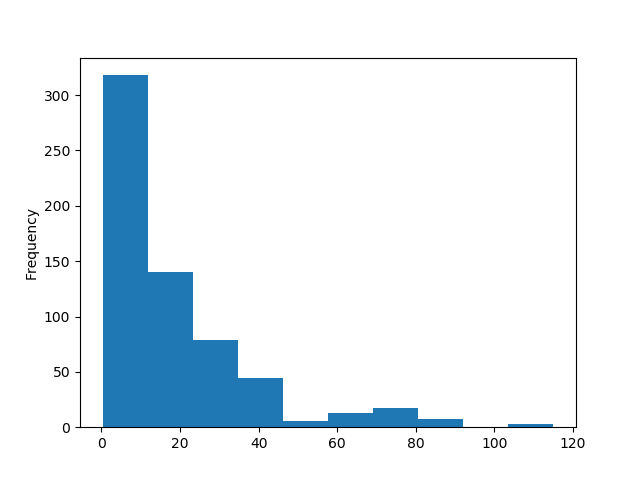

In [67]:
measures['Measures'].plot.hist()

<IPython.core.display.Javascript object>


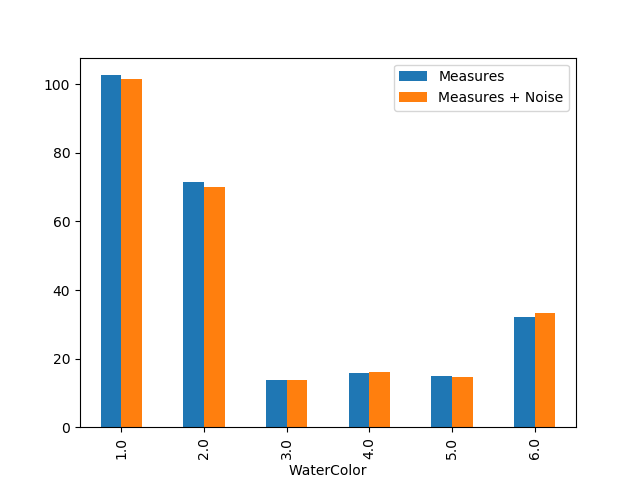

In [85]:
measures.groupby('WaterColor').mean().plot.bar()

In [86]:
measures.groupby('WaterColor').size().plot.bar()

In [87]:
# In this example, I made up a second variable to plot against my measurements data
# I added random normal fluctuations to the measurements data (i.e., random noise)
measures['Measures + Noise'] = measures['Measures'] + np.random.normal(0,4,627)

<IPython.core.display.Javascript object>


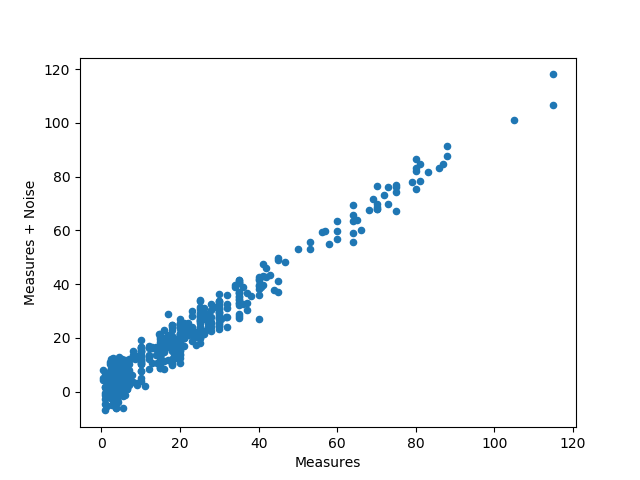

In [88]:
measures.plot.scatter(y = 'Measures + Noise', x = 'Measures')

<IPython.core.display.Javascript object>


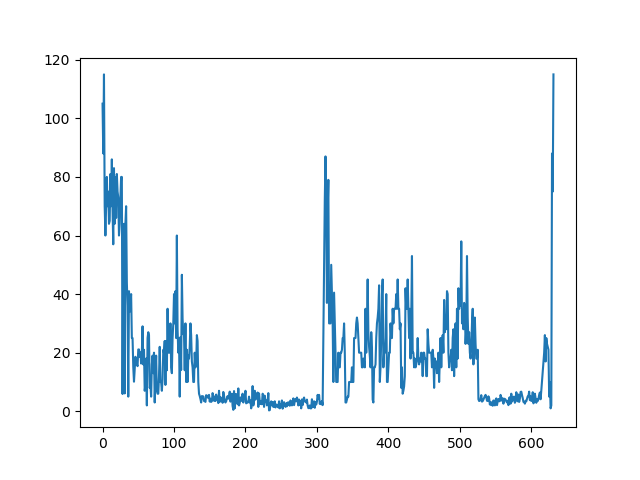

In [89]:
measures['Measures'].plot()

<IPython.core.display.Javascript object>


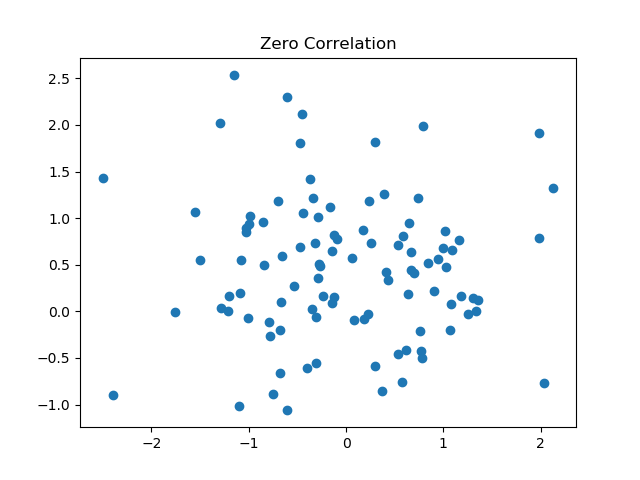

In [90]:
rn = np.array([[np.random.normal(0,1,100)],[np.random.normal(0.5,0.8,100)]])
plt.scatter(rn[0], rn[1])
plt.title('Zero Correlation')
plt.show()

<IPython.core.display.Javascript object>


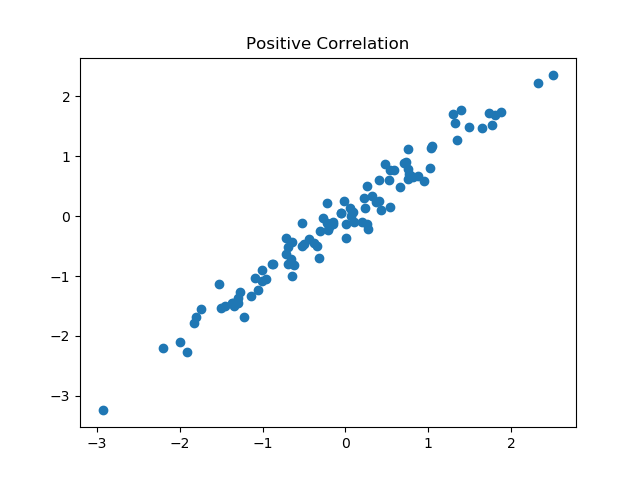

In [91]:
w = np.random.normal(0,1,100)
rn = np.array([w,w+2*np.random.normal(0,0.1,100)])
plt.scatter(rn[0], rn[1])
plt.title('Positive Correlation')
plt.show()

<IPython.core.display.Javascript object>


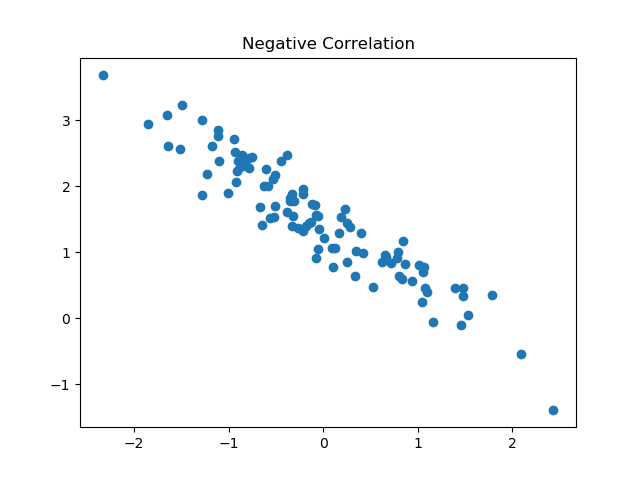

In [92]:
w = np.random.normal(0,1,100)
rn = np.array([w, -w+3*np.random.normal(0.5,0.1,100)])
plt.scatter(rn[0], rn[1])
plt.title('Negative Correlation')
plt.show()

<IPython.core.display.Javascript object>


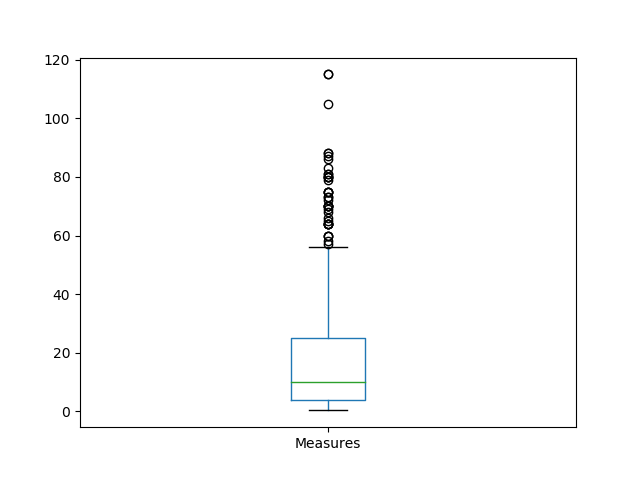

In [93]:
measures['Measures'].plot.box()

In [94]:
measures.head()

,Measures,WaterColor,Measures + Noise
0,105.0,1.0,100.917895
1,88.0,1.0,87.463041
2,115.0,1.0,118.005763
3,70.0,2.0,68.527288
4,60.0,2.0,63.625469


In [95]:
np.corrcoef(measures['Measures'], measures['Measures + Noise'])

array([[1.        , 0.97885781],
       [0.97885781, 1.        ]])

In [96]:
# The p-value near zero indicates the correlation is statistically significant
rho, pstat = scipy.stats.pearsonr(measures['Measures'], measures['Measures + Noise'])
print('rho = %.4f' % rho, 'p-val = %.4f' % pstat)

rho = 0.9789 p-val = 0.0000


In [97]:
# We're testing the hypothesis that the two sample means are equal (statistically speaking)
tstat, pval = scipy.stats.ttest_ind(measures['Measures'], measures['Measures + Noise'])
print('t-stat = %.3f ' % tstat, 'p-value = %.3f' % pval)

t-stat = 0.003  p-value = 0.998


In [98]:
# Test if the mean measurements in two water colors are the same --- they're not; low p-value
tstat, pval = scipy.stats.ttest_ind(v1, v5)
print('t-stat = %.3f ' % tstat, 'p-value = %.3f' % pval)

t-stat = 12.106  p-value = 0.000


In [99]:
# If you want to test if there is a difference in the means from multiple groups
# use Analysis of Variance(ANOVA) 
fstat, pval = stats.f_oneway(v1, v3, v4, v5, v6)
print('ANOVA Results', 'fstat = %.3f' % fstat, 'p-value = %.3f' % pval, '\n', sep='\t')

# The null nypothesis for ANOVA is all means are equal
# If your test suggests rejecting the null you need to do a Tukey HSD comparison
# to see which pairs of means are different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(measures['Measures'], measures['WaterColor']))

ANOVA Results	fstat = 17.275	p-value = 0.000	

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff   lower    upper   reject
------------------------------------------------
 1.0    2.0   -31.1667  -57.0026 -5.3308   True 
 1.0    3.0   -88.9804 -113.5172 -64.4436  True 
 1.0    4.0   -87.0017 -111.5506 -62.4529  True 
 1.0    5.0   -87.7227 -112.2715 -63.1738  True 
 1.0    6.0   -70.5238  -97.3654 -43.6823  True 
 2.0    3.0   -57.8137  -66.9182 -48.7093  True 
 2.0    4.0   -55.8351  -64.9721 -46.6981  True 
 2.0    5.0   -56.556   -65.693  -47.419   True 
 2.0    6.0   -39.3571  -53.5454 -25.1689  True 
 3.0    4.0    1.9786   -2.2693   6.2265  False 
 3.0    5.0    1.2577   -2.9902   5.5056  False 
 3.0    6.0   18.4566    6.8004  30.1128   True 
 4.0    5.0   -0.7209   -5.0382   3.5963  False 
 4.0    6.0   16.4779    4.7963  28.1596   True 
 5.0    6.0   17.1989    5.5172  28.8805   True 
------------------------------------------------


In [100]:
# fixing the pH data issue for out of bounds data -- pH ranges from 0 to 14 
phs = pd.Series(['17.6', '8.2', '7.5'])
phsf = phs.astype(float)

In [101]:
phsf[phsf > 14.0] = np.nan
phsf

0    NaN
1    8.2
2    7.5
dtype: float64

In [102]:
phsf.mean()

7.85